### Import libraries

In [1]:
#Import the required Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import solar output dataset

In [2]:
data = pd.read_csv('./PV_Output_Hannover_MA.csv')

In [3]:
#Reading the solar output data measure as %baseline
data.head(5)

,Timestamp,% Baseline,City,County,State
0,"Jan 1, 2014 7am",0.0079,Hanover,Plymouth,Massachusetts
1,"Jan 1, 2014 8am",0.1019,Hanover,Plymouth,Massachusetts
2,"Jan 1, 2014 9am",0.3932,Hanover,Plymouth,Massachusetts
3,"Jan 1, 2014 10am",0.5447,Hanover,Plymouth,Massachusetts
4,"Jan 1, 2014 11am",0.5485,Hanover,Plymouth,Massachusetts


In [4]:
del data['City']
del data['County']
del data['State']

In [5]:
data.head(5)

,Timestamp,% Baseline
0,"Jan 1, 2014 7am",0.0079
1,"Jan 1, 2014 8am",0.1019
2,"Jan 1, 2014 9am",0.3932
3,"Jan 1, 2014 10am",0.5447
4,"Jan 1, 2014 11am",0.5485


In [6]:
#Change Timestamp column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

### Making an API call to www.worldweatheronline.com to retrieve weather data for Hanover, Massachusetts location between 2014 and 2018

In [7]:
#Retrieving weather data from www.worldweatheronline.com into pandas dataframe and csv.
# from wwo_hist import retrieve_hist_data
# import os
# #writing csv file to the output folder
# os.chdir("./output")
# frequency = 1
# start_date = '01-JAN-2014'
# end_date = '03-05-2018'
# api_key = 'YOUR_API_KEY'
# location_list = ['02340']
# hist_weather_data = retrieve_hist_data(api_key,
#                                 location_list,
#                                 start_date,
#                                 end_date,
#                                 frequency,
#                                 location_label = False,
#                                 export_csv = True,
#                                 store_df = True)

In [8]:
weather_df = pd.read_csv('./output/02340.csv')

In [9]:
weather_df.head(3)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2014-01-01 00:00:00,-3,-6,0.0,8.7,2,1,06:58 AM,05:05 PM,07:12 AM,...,28,3,58,0.0,1022,-4,10,273,20,2340
1,2014-01-01 01:00:00,-3,-6,0.0,8.7,2,1,06:58 AM,05:05 PM,07:12 AM,...,31,4,58,0.0,1023,-5,10,274,22,2340
2,2014-01-01 02:00:00,-3,-6,0.0,8.7,2,1,06:58 AM,05:05 PM,07:12 AM,...,34,5,58,0.0,1024,-5,10,276,25,2340


In [10]:
#Change date_time column to datetime
weather_df['date_time'] = pd.to_datetime(weather_df['date_time'])
#Deleting some of the columns
del weather_df['location']
del weather_df['moonrise']
del weather_df['moonset']
del weather_df['sunrise']
del weather_df['sunset']
del weather_df['pressure']

In [11]:
#Merging weather data with the original solar output data
outcome = pd.merge(data, weather_df, how='left', left_on='Timestamp', right_on='date_time')

In [12]:
del outcome['date_time']

In [13]:
outcome.head(3)

,Timestamp,% Baseline,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,tempC,visibility,winddirDegree,windspeedKmph
0,2014-01-01 07:00:00,0.0079,-3,-6,0.0,8.7,2,1,-14,-13,-5,-13,24,13,52,0.0,-5,10,262,18
1,2014-01-01 08:00:00,0.1019,-3,-6,0.0,8.7,2,1,-14,-12,-5,-12,26,11,49,0.0,-5,10,266,20
2,2014-01-01 09:00:00,0.3932,-3,-6,0.0,8.7,2,1,-14,-11,-4,-11,27,9,46,0.0,-4,10,270,22


### Reading Solar Irradiance datasets from https://nsrdb.nrel.gov/ for 2014, 2015, 2016, 2017 and 2018

In [14]:
# Reading Solar irradiance data for the year 2014 from National Solar Radiation Database
df1= pd.read_csv('./Weather_data_2014.csv')

In [15]:
#df1

In [16]:
# Reading Solar irradiance data for the year 2015 from National Solar Radiation Database
df2= pd.read_csv('./Weather_data_2015.csv')

In [17]:
#df2

In [18]:
# Reading Solar irradiance data for the year 2016 from National Solar Radiation Database
df3= pd.read_csv('./Weather_data_2016.csv')

In [19]:
#df3

In [20]:
# Reading Solar irradiance data for the year 2017 from National Solar Radiation Database
df4= pd.read_csv('./Weather_data_2017.csv')

In [21]:
#df4

In [22]:
# Reading Solar irradiance data for the year 2018 from National Solar Radiation Database
df5= pd.read_csv('./Weather_data_2018.csv')

In [23]:
#df5

In [24]:
#Stacking all the Solar irradiance data into one dataframe 
result = pd.concat([df1,df2, df3, df4, df5], ignore_index=True)

In [25]:
result.head(5)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure
0,2014,1,1,0,0,0,0,0,0,0,0,1,-6.0,124.02,0,0.12,3.5,78.43,-3.0,1010
1,2014,1,1,1,0,0,0,0,0,0,0,1,-5.0,135.09,0,0.12,3.8,81.74,-3.0,1010
2,2014,1,1,2,0,0,0,0,0,0,0,1,-5.0,145.77,0,0.12,4.2,81.25,-3.0,1010
3,2014,1,1,3,0,0,0,0,0,0,0,1,-6.0,155.07,0,0.12,4.5,74.14,-3.0,1010
4,2014,1,1,4,0,0,0,0,0,0,0,1,-8.0,160.55,0,0.12,4.6,72.80,-4.0,1010


In [26]:
#Combining Year Month Day Hour Minute column into a single datatime column(easy to merge on the date_time column with 
#the final dataframe)
result['date_time']= pd.to_datetime(result[['Year', 'Month', 'Day', 'Hour', 'Minute']])
#Delete the individual columns after combining
del result['Year']
del result['Month']
del result['Day']
del result['Hour']
del result['Minute']

In [27]:
#Merge the final dataframe with the above Solar irradiance data
merged_df = pd.merge(outcome, result, how='left', left_on='Timestamp', right_on='date_time')

In [28]:
del merged_df['date_time']

In [29]:
#Deleting duplicate columns from the dataset
merged_df['Year'] = merged_df['Timestamp'].dt.year
merged_df['Month'] = merged_df['Timestamp'].dt.month
merged_df['Day'] = merged_df['Timestamp'].dt.day
merged_df['Hour'] = merged_df['Timestamp'].dt.hour
merged_df['Minute'] = merged_df['Timestamp'].dt.minute

In [30]:
del merged_df['Timestamp']

In [31]:
merged_df.head(3)

,% Baseline,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure,Year,Month,Day,Hour,Minute
0,0.0079,-3,-6,0.0,8.7,2,1,-14,-13,-5,...,0.12,4.4,69.95,-5.0,1020,2014,1,1,7,0
1,0.1019,-3,-6,0.0,8.7,2,1,-14,-12,-5,...,0.12,4.3,74.24,-6.0,1020,2014,1,1,8,0
2,0.3932,-3,-6,0.0,8.7,2,1,-14,-11,-4,...,0.12,4.3,73.07,-6.0,1020,2014,1,1,9,0


In [32]:
#merged_df.dtypes

In [33]:
#merged_df.shape

In [34]:
#View the column names of the dataframe
col_names = merged_df.columns
#col_names

In [35]:
# view summary of dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20571 entries, 0 to 20570
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   % Baseline          20571 non-null  float64
 1   maxtempC            20571 non-null  int64  
 2   mintempC            20571 non-null  int64  
 3   totalSnow_cm        20571 non-null  float64
 4   sunHour             20571 non-null  float64
 5   uvIndex             20571 non-null  int64  
 6   moon_illumination   20571 non-null  int64  
 7   DewPointC           20571 non-null  int64  
 8   FeelsLikeC          20571 non-null  int64  
 9   HeatIndexC          20571 non-null  int64  
 10  WindChillC          20571 non-null  int64  
 11  WindGustKmph        20571 non-null  int64  
 12  cloudcover          20571 non-null  int64  
 13  humidity            20571 non-null  int64  
 14  precipMM            20571 non-null  float64
 15  tempC               20571 non-null  int64  
 16  visi

In [36]:
# view summary statistics in numerical variables
round(merged_df.describe(),2)

,% Baseline,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure,Year,Month,Day,Hour,Minute
count,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,...,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,20571.00,20571.0
mean,0.24,14.76,8.36,0.12,10.41,3.77,50.25,7.22,10.83,12.89,...,0.21,2.59,81.44,10.87,1007.63,2015.55,6.42,15.73,11.98,0.0
std,0.25,9.53,8.56,0.85,3.40,1.74,28.91,9.28,11.74,9.74,...,0.23,1.33,16.97,9.48,8.76,1.17,3.24,8.86,4.21,0.0
min,0.00,-12.00,-20.00,0.00,3.40,1.00,0.00,-22.00,-32.00,-20.00,...,0.11,0.10,30.31,-19.00,970.00,2014.00,1.00,1.00,0.00,0.0
25%,0.03,7.00,2.00,0.00,8.70,2.00,25.00,1.00,2.00,5.00,...,0.12,1.60,68.30,3.00,1000.00,2015.00,4.00,8.00,8.00,0.0
50%,0.13,15.00,9.00,0.00,11.20,4.00,50.00,9.00,12.00,13.00,...,0.13,2.40,85.21,11.00,1010.00,2016.00,6.00,16.00,12.00,0.0
75%,0.39,23.00,16.00,0.00,13.50,5.00,75.00,15.00,20.00,21.00,...,0.14,3.30,97.75,19.00,1010.00,2017.00,9.00,23.00,15.00,0.0
max,1.02,32.00,23.00,22.20,14.50,7.00,100.00,25.00,36.00,36.00,...,0.87,11.00,100.00,32.00,1040.00,2018.00,12.00,31.00,21.00,0.0


In [37]:
del merged_df['Minute']

In [38]:
# checking the correlation matrix between the predictors and the dependent variable of capacity_factor
corr_test = merged_df[['% Baseline','maxtempC','mintempC','totalSnow_cm','sunHour','uvIndex','moon_illumination','DewPointC',
              'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
              'precipMM','tempC', 'visibility', 'winddirDegree', 'windspeedKmph','DHI','DNI','GHI','Clearsky DHI','Clearsky DNI','Clearsky GHI','Cloud Type','Dew Point','Solar Zenith Angle','Fill Flag','Surface Albedo','Wind Speed','Relative Humidity',
                     'Temperature','Pressure', 'Year','Month','Day','Hour']]
corr = corr_test.corr()
corr.style.background_gradient(cmap='Greens').set_precision(2)

,% Baseline,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,tempC,visibility,winddirDegree,windspeedKmph,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure,Year,Month,Day,Hour
% Baseline,1.00,0.22,0.17,-0.08,0.37,0.24,0.02,0.11,0.32,0.33,0.32,-0.13,-0.33,-0.57,-0.12,0.33,0.21,-0.01,-0.06,0.08,0.31,0.22,0.12,0.20,0.13,-0.28,0.12,-0.27,0.01,-0.15,-0.16,-0.14,0.17,0.07,-0.02,-0.02,0.01,0.01
maxtempC,0.22,1.00,0.96,-0.19,0.68,0.93,-0.01,0.93,0.97,0.97,0.97,-0.18,-0.27,0.00,0.02,0.97,0.22,-0.12,-0.30,0.23,0.10,0.25,0.21,0.10,0.22,-0.14,0.94,-0.27,-0.09,-0.51,-0.51,-0.01,0.94,-0.18,-0.06,0.38,0.02,0.07
mintempC,0.17,0.96,1.00,-0.19,0.60,0.88,-0.02,0.94,0.96,0.96,0.96,-0.17,-0.17,0.07,0.04,0.96,0.18,-0.20,-0.27,0.23,0.05,0.20,0.21,0.09,0.21,-0.08,0.96,-0.26,-0.09,-0.55,-0.46,0.04,0.94,-0.20,-0.04,0.42,0.02,0.07
totalSnow_cm,-0.08,-0.19,-0.19,1.00,-0.17,-0.19,0.05,-0.16,-0.19,-0.18,-0.19,0.07,0.13,0.08,0.18,-0.19,-0.27,0.03,0.09,-0.04,-0.05,-0.06,-0.01,-0.03,-0.04,0.09,-0.16,0.04,0.03,0.24,0.10,0.02,-0.17,-0.03,0.01,-0.11,-0.05,-0.01
sunHour,0.37,0.68,0.60,-0.17,1.00,0.70,0.03,0.52,0.64,0.64,0.64,-0.22,-0.57,-0.28,-0.13,0.64,0.32,0.02,-0.29,0.24,0.29,0.38,0.21,0.17,0.29,-0.33,0.55,-0.31,-0.09,-0.31,-0.41,-0.23,0.63,-0.06,-0.10,0.01,0.01,0.08
uvIndex,0.24,0.93,0.88,-0.19,0.70,1.00,0.01,0.83,0.90,0.90,0.90,-0.21,-0.35,-0.09,-0.02,0.90,0.25,-0.08,-0.31,0.21,0.15,0.27,0.19,0.10,0.22,-0.20,0.84,-0.26,-0.08,-0.42,-0.49,-0.10,0.87,-0.09,-0.05,0.35,0.03,0.07
moon_illumination,0.02,-0.01,-0.02,0.05,0.03,0.01,1.00,-0.02,-0.01,-0.01,-0.01,0.02,-0.05,-0.04,0.01,-0.01,0.03,0.05,0.01,-0.01,0.03,0.02,-0.00,0.00,-0.00,-0.02,-0.02,0.01,0.02,0.04,0.02,-0.02,-0.02,0.08,0.01,-0.00,-0.16,-0.00
DewPointC,0.11,0.93,0.94,-0.16,0.52,0.83,-0.02,1.00,0.94,0.93,0.94,-0.11,-0.04,0.30,0.12,0.94,0.09,-0.23,-0.25,0.25,-0.00,0.18,0.25,0.09,0.22,0.01,0.96,-0.27,-0.08,-0.45,-0.47,0.13,0.91,-0.24,-0.08,0.35,0.02,0.08
FeelsLikeC,0.32,0.97,0.96,-0.19,0.64,0.90,-0.01,0.94,1.00,0.99,1.00,-0.22,-0.23,-0.04,0.02,1.00,0.23,-0.17,-0.33,0.25,0.13,0.26,0.24,0.15,0.25,-0.13,0.93,-0.32,-0.08,-0.52,-0.54,-0.01,0.93,-0.15,-0.05,0.39,0.02,0.09
HeatIndexC,0.33,0.97,0.96,-0.18,0.64,0.90,-0.01,0.93,0.99,1.00,0.99,-0.17,-0.23,-0.05,0.03,1.00,0.21,-0.15,-0.27,0.25,0.13,0.26,0.24,0.15,0.25,-0.13,0.93,-0.32,-0.08,-0.50,-0.50,-0.01,0.93,-0.17,-0.04,0.38,0.02,0.09


#### Feature Engineering  

In [39]:
merged_df['Hour'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  6, 18,  5, 19, 20,  4,
       21,  0,  1,  2,  3], dtype=int64)

In [40]:
merged_df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [41]:
max_hour = merged_df['Hour'].max()
max_hour

21

In [42]:
# Create Cyclic date features
merged_df['Hour_sin'] = np.sin(2 * np.pi * merged_df['Hour']/max_hour)
merged_df['Hour_cos'] = np.cos(2 * np.pi * merged_df['Hour']/max_hour)
merged_df['sine_mon']= np.sin((merged_df.Month - 1)*np.pi/12)
merged_df['cos_mon']= np.cos((merged_df.Month - 1)*np.pi/12)

In [43]:
del merged_df['Hour']
del merged_df['Month']

In [44]:
merged_df

,% Baseline,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,Wind Speed,Relative Humidity,Temperature,Pressure,Year,Day,Hour_sin,Hour_cos,sine_mon,cos_mon
0,0.0079,-3,-6,0.0,8.7,2,1,-14,-13,-5,...,4.4,69.95,-5.0,1020,2014,1,0.866025,-0.500000,0.0,1.000000
1,0.1019,-3,-6,0.0,8.7,2,1,-14,-12,-5,...,4.3,74.24,-6.0,1020,2014,1,0.680173,-0.733052,0.0,1.000000
2,0.3932,-3,-6,0.0,8.7,2,1,-14,-11,-4,...,4.3,73.07,-6.0,1020,2014,1,0.433884,-0.900969,0.0,1.000000
3,0.5447,-3,-6,0.0,8.7,2,1,-14,-10,-4,...,4.1,72.43,-6.0,1020,2014,1,0.149042,-0.988831,0.0,1.000000
4,0.5485,-3,-6,0.0,8.7,2,1,-14,-10,-3,...,3.9,72.47,-6.0,1020,2014,1,-0.149042,-0.988831,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20566,0.2325,4,1,0.0,5.7,1,79,-1,-2,4,...,5.5,87.86,1.9,1010,2018,5,-0.680173,-0.733052,0.5,0.866025
20567,0.2214,4,1,0.0,5.7,1,79,-1,-1,4,...,5.6,84.15,2.5,1010,2018,5,-0.866025,-0.500000,0.5,0.866025
20568,0.3111,4,1,0.0,5.7,1,79,-1,-1,4,...,5.7,79.86,3.2,1010,2018,5,-0.974928,-0.222521,0.5,0.866025
20569,0.0810,4,1,0.0,5.7,1,79,-1,-2,4,...,5.7,76.97,3.7,1010,2018,5,-0.997204,0.074730,0.5,0.866025


In [45]:
mask2 = np.triu(np.ones_like(merged_df.corr(), dtype=bool))

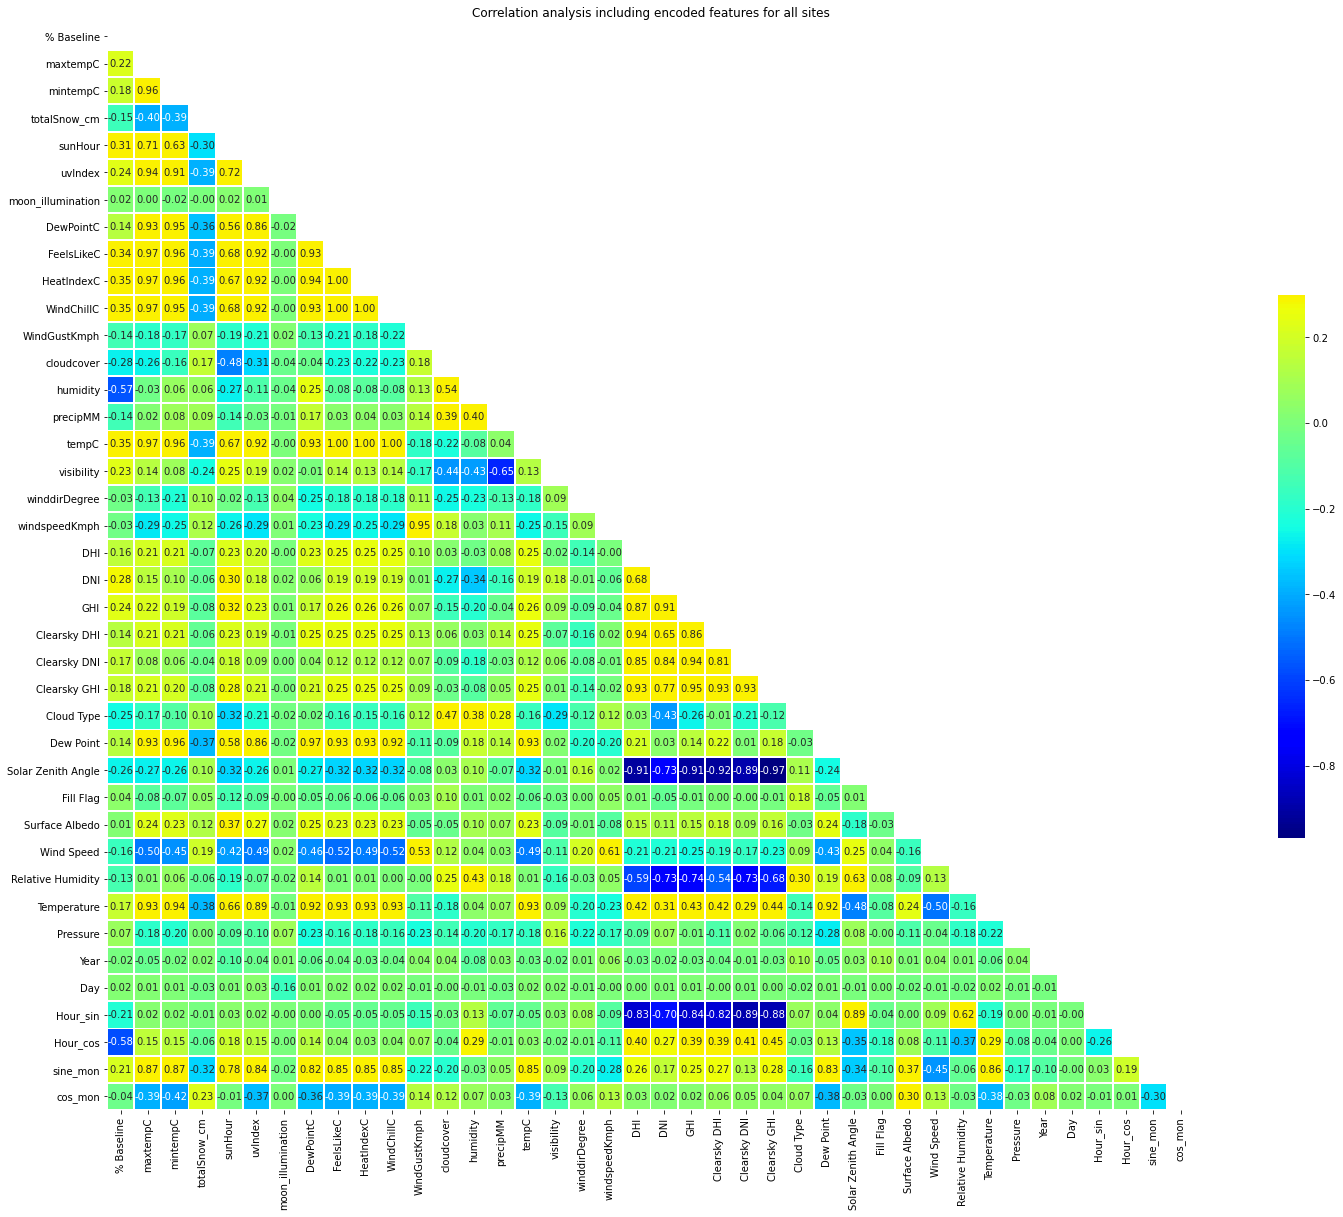

In [46]:
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(merged_df.corr(method='spearman'), mask=mask2, cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.9, cbar_kws={"shrink": .5});
plt.title('Correlation analysis including encoded features for all sites');

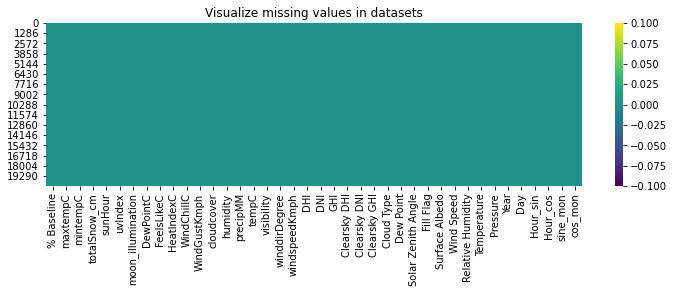

In [47]:
plt.figure(figsize=(12, 3))
sns.heatmap(merged_df.isnull(), cmap='viridis');
plt.title('Visualize missing values in datasets');

In [48]:
merged_df.head(3)

,% Baseline,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,Wind Speed,Relative Humidity,Temperature,Pressure,Year,Day,Hour_sin,Hour_cos,sine_mon,cos_mon
0,0.0079,-3,-6,0.0,8.7,2,1,-14,-13,-5,...,4.4,69.95,-5.0,1020,2014,1,0.866025,-0.500000,0.0,1.0
1,0.1019,-3,-6,0.0,8.7,2,1,-14,-12,-5,...,4.3,74.24,-6.0,1020,2014,1,0.680173,-0.733052,0.0,1.0
2,0.3932,-3,-6,0.0,8.7,2,1,-14,-11,-4,...,4.3,73.07,-6.0,1020,2014,1,0.433884,-0.900969,0.0,1.0


## Linear Regression Model with Python and Scikit-Learn

### Declare feature vector and target variable

In [49]:
X = merged_df.drop(['% Baseline'], axis=1)
y= merged_df['% Baseline']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Feature Selection - Dropping features using Pearson Correlation  

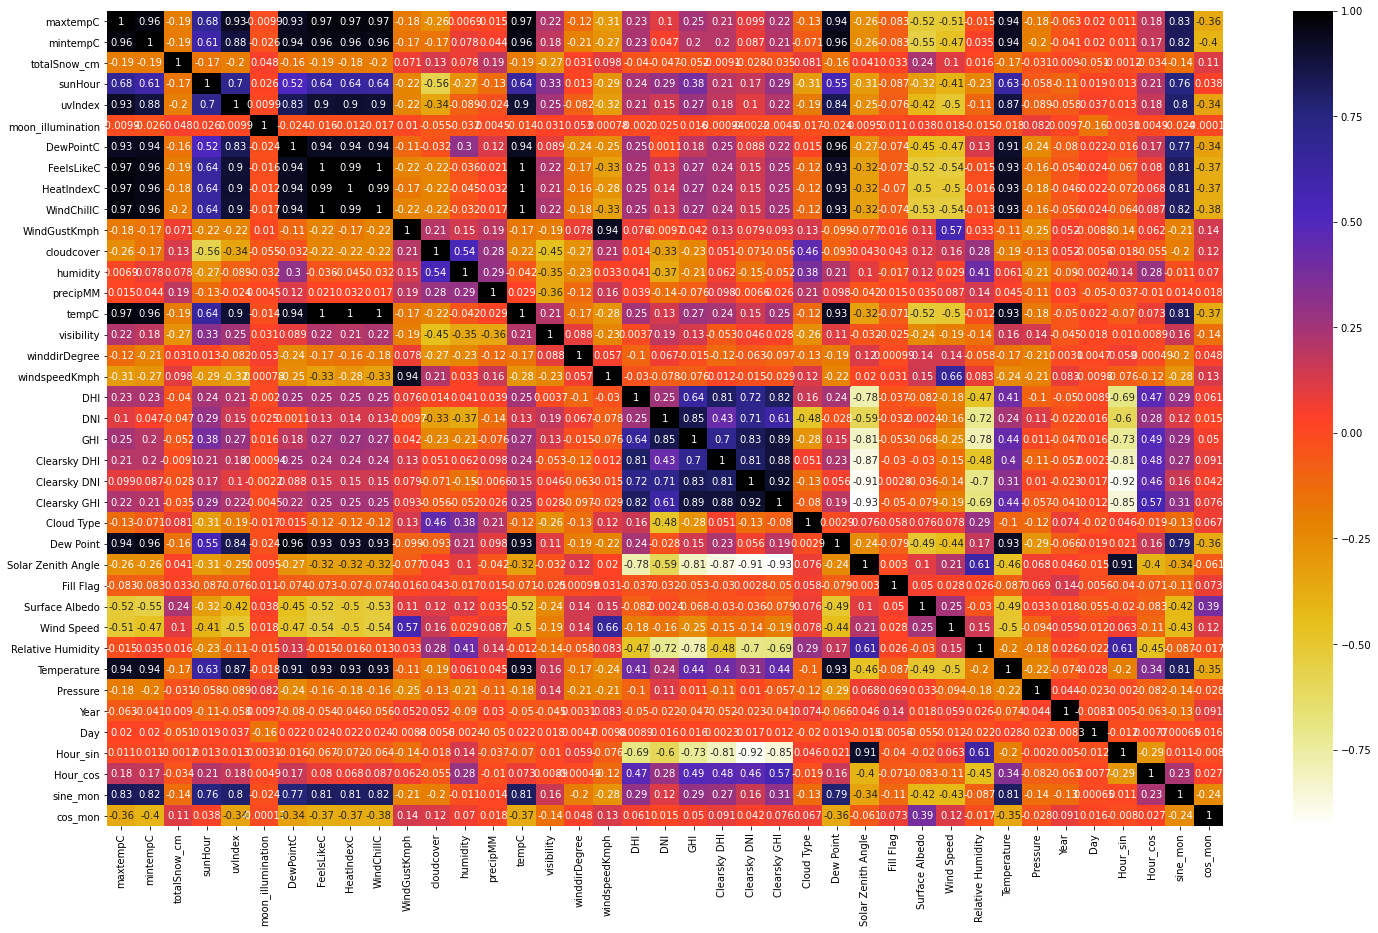

In [51]:
plt.figure(figsize=(25,15))
cor=X_train.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [52]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [53]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

12

In [54]:
corr_features

{'Clearsky GHI',
 'Dew Point',
 'DewPointC',
 'FeelsLikeC',
 'HeatIndexC',
 'Hour_sin',
 'Temperature',
 'WindChillC',
 'mintempC',
 'tempC',
 'uvIndex',
 'windspeedKmph'}

In [55]:
X_train.drop(corr_features, axis=1)
X_test.drop(corr_features, axis=1)

,maxtempC,totalSnow_cm,sunHour,moon_illumination,WindGustKmph,cloudcover,humidity,precipMM,visibility,winddirDegree,...,Fill Flag,Surface Albedo,Wind Speed,Relative Humidity,Pressure,Year,Day,Hour_cos,sine_mon,cos_mon
6439,14,0.0,12.2,64,27,67,65,0.0,9,219,...,0,0.123,4.8,94.20,1000,2015,28,-0.988831,0.707107,7.071068e-01
4315,16,0.0,5.5,16,24,74,85,0.1,10,130,...,4,0.128,2.5,96.85,1010,2014,21,-0.988831,0.707107,-7.071068e-01
11008,2,1.2,10.2,79,21,88,65,0.0,10,77,...,0,0.119,3.4,56.77,1010,2016,20,-0.222521,0.500000,8.660254e-01
292,-3,0.0,8.7,43,8,8,66,0.0,10,319,...,4,0.866,3.5,88.69,1010,2014,6,-0.900969,0.258819,9.659258e-01
15542,-1,0.0,8.7,53,32,6,56,0.0,10,297,...,0,0.119,4.9,76.60,1010,2017,4,-0.222521,0.258819,9.659258e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11332,13,0.0,13.1,28,66,46,58,0.0,10,202,...,0,0.119,4.1,74.71,1010,2016,11,-0.222521,0.707107,7.071068e-01
3727,21,0.0,12.9,93,20,53,61,0.0,10,73,...,0,0.136,2.9,53.20,1020,2014,8,-0.222521,0.866025,-5.000000e-01
7933,29,0.0,14.5,94,47,46,75,0.2,10,215,...,0,0.142,2.8,65.93,1000,2015,30,0.074730,1.000000,6.123234e-17
8559,32,0.0,12.9,35,20,6,63,0.0,10,242,...,0,0.130,2.4,94.92,1010,2015,8,-0.733052,0.866025,-5.000000e-01


In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [58]:
model.fit(X_train,y_train)

LinearRegression()

In [59]:
print('Coefficients: \n', model.coef_)

Coefficients: 
 [-8.62819368e-03 -5.51102055e-03 -1.03481641e-03  7.04442650e-03
 -9.67486404e-03  1.02643040e-04 -1.36062849e-02  1.46588165e-03
  8.57242894e-04  5.59977826e-03 -2.16848716e-03 -8.41077153e-04
 -2.15501860e-04 -1.06183114e-02  2.71619923e-02 -1.34890331e-03
 -6.70323725e-05  3.51231319e-03  2.44236518e-04  1.38565395e-04
 -9.14215091e-05  3.90299787e-04  2.82660989e-05  6.99871309e-05
 -4.42992404e-03 -3.62600786e-04  1.06046154e-03 -1.91314817e-05
 -7.32143346e-02  2.09852498e-03 -2.74199381e-04 -4.78914085e-03
 -1.87206430e-04 -9.33975170e-03  1.85583884e-04 -4.87755433e-02
 -2.42430126e-01  1.32753021e-01  6.28587517e-02]


In [60]:
predictions = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

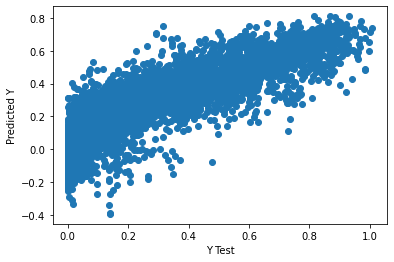

In [61]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [62]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.102267770380002
MSE: 0.017401324007794032
RMSE: 0.13191407812585446


In [63]:
coeffecients = pd.DataFrame(model.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
maxtempC,-0.008628
mintempC,-0.005511
totalSnow_cm,-0.001035
sunHour,0.007044
uvIndex,-0.009675
moon_illumination,0.000103
DewPointC,-0.013606
FeelsLikeC,0.001466
HeatIndexC,0.000857
WindChillC,0.005600


In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.732061265383269


In [65]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [-8.88768250e-03 -6.27521721e-03 -9.12079939e-04  7.14712707e-03
 -1.00211057e-02  9.66926073e-05 -1.38384639e-02  1.12904385e-03
  2.04329394e-03  6.02075701e-03 -2.05392517e-03 -8.31937979e-04
 -2.11977822e-04 -1.07214648e-02  2.64201176e-02 -1.45196100e-03
 -7.53015909e-05  3.24699004e-03  2.56554139e-04  1.42556803e-04
 -9.16289705e-05  4.23176153e-04  3.95055243e-05  6.58826470e-05
 -4.25137202e-03 -2.34662895e-03  1.02182958e-03 -1.58342875e-05
 -7.17496900e-02  2.68881283e-03  2.75220411e-04 -2.48147123e-03
 -2.48235922e-04 -9.20313601e-03  1.80819007e-04 -4.02037741e-02
 -2.44265689e-01  1.32617134e-01  6.12752378e-02]
y-axis intercept:  18.589006460418105


In [66]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 0.0079
Predicted output: 0.16354892330740256
Prediction Error: 0.15564892330740257


In [67]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,0.163549,0.0079,0.155649
1,0.218953,0.1019,0.117053
2,0.302605,0.3932,-0.090595
3,0.326419,0.5447,-0.218281
4,0.361003,0.5485,-0.187497
...,...,...,...
20566,0.256269,0.2325,0.023769
20567,0.242672,0.2214,0.021272
20568,0.231493,0.3111,-0.079607
20569,0.122749,0.0810,0.041749


In [68]:
preds=model.predict(X_test)
preds

array([0.45113578, 0.22813438, 0.28181027, ..., 0.34525823, 0.3346479 ,
       0.27351499])